# Healthcare Fraud Detection - Model Evaluation

This notebook evaluates the trained fraud detection model with comprehensive metrics and analysis.

## 1. Setup and Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, roc_curve, precision_recall_curve,
    precision_score, recall_score, f1_score
)
import joblib

%matplotlib inline
sns.set_style('whitegrid')

## 2. Load Test Predictions

Upload  `test_predictions.csv` file using the file upload button on the left sidebar.

In [ ]:
# Load predictions
preds_df = pd.read_csv('/content/test_predictions.csv')

# Extract predictions
y_test = preds_df['y_true']
y_pred = preds_df['y_pred']
y_prob = preds_df['y_prob']

print(f"Total test samples: {len(y_test)}")
print(f"Fraud cases: {y_test.sum()}")
print(f"Non-fraud cases: {(y_test == 0).sum()}")

Total test samples: 1082
Fraud cases: 101
Non-fraud cases: 981


## 3. Performance Metrics

In [ ]:
# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("=" * 50)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

MODEL PERFORMANCE METRICS
Precision: 0.5200
Recall: 0.7723
F1 Score: 0.6215
ROC-AUC: 0.9464
PR-AUC: 0.7370

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.93      0.95       981
       Fraud       0.52      0.77      0.62       101

    accuracy                           0.91      1082
   macro avg       0.75      0.85      0.79      1082
weighted avg       0.93      0.91      0.92      1082



## 4. Confusion Matrix

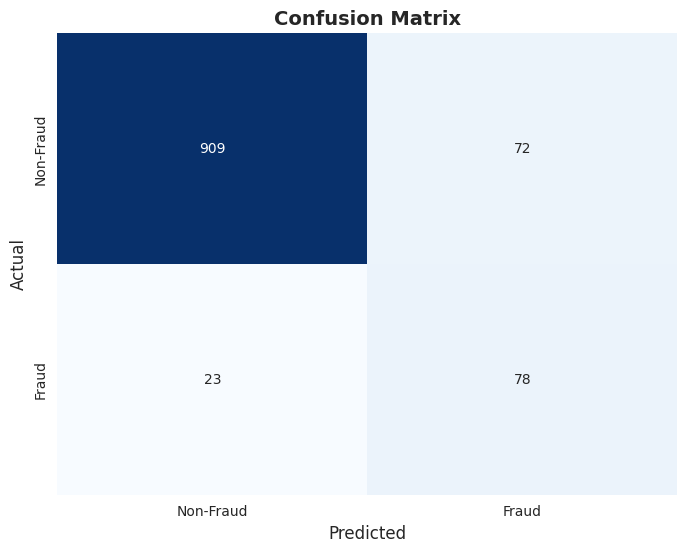


True Negatives: 909
False Positives: 72
False Negatives: 23
True Positives: 78


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.show()

# Print confusion matrix values
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

## 5. ROC and Precision-Recall Curves

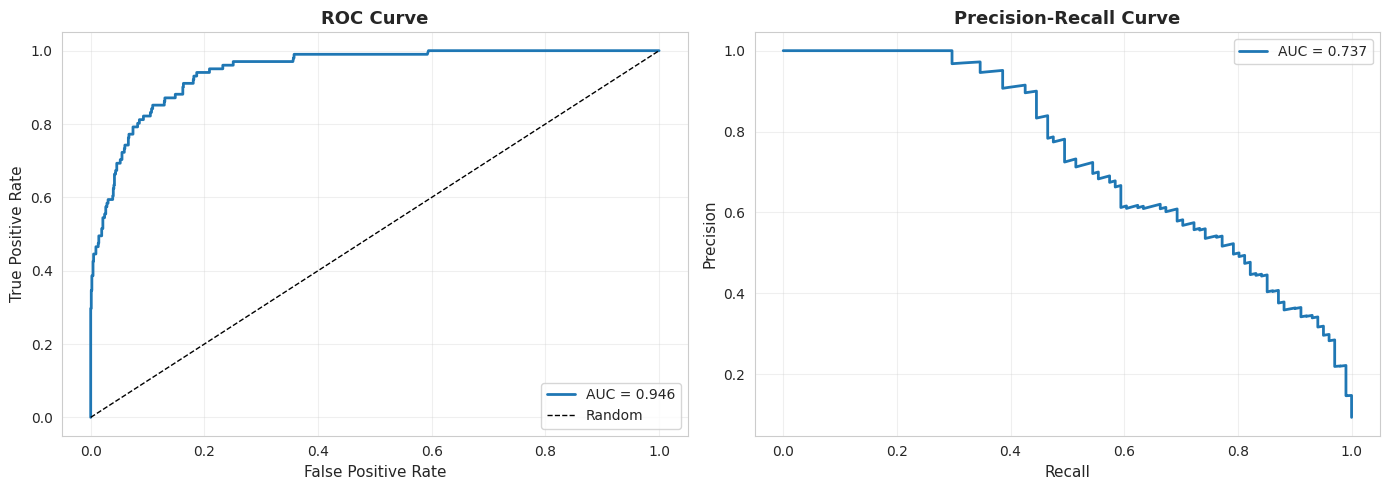

In [ ]:
# Calculate curves
fpr, tpr, _ = roc_curve(y_test, y_prob)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', linewidth=2)
axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
axes[0].set_xlabel('False Positive Rate', fontsize=11)
axes[0].set_ylabel('True Positive Rate', fontsize=11)
axes[0].set_title('ROC Curve', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Precision-Recall Curve
axes[1].plot(recall_curve, precision_curve, label=f'AUC = {pr_auc:.3f}', linewidth=2)
axes[1].set_xlabel('Recall', fontsize=11)
axes[1].set_ylabel('Precision', fontsize=11)
axes[1].set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Cost-Based Analysis

Assumptions:
- Cost of False Negative (missed fraud): $10,000
- Cost of False Positive (unnecessary investigation): $1,000

COST ANALYSIS
False Negatives: 23 × $10,000 = $230,000
False Positives: 72 × $1,000 = $72,000
--------------------------------------------------
Total Estimated Cost: $302,000


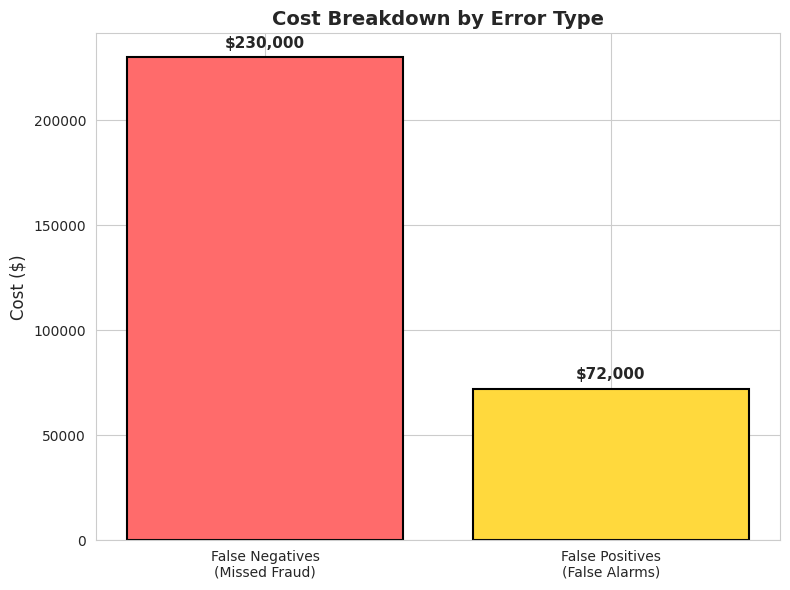

In [ ]:
# Cost parameters
cost_fn = 10000  # Cost of missing fraud
cost_fp = 1000   # Cost of false alarm

# Calculate total cost
total_cost = (fn * cost_fn) + (fp * cost_fp)

print("=" * 50)
print("COST ANALYSIS")
print("=" * 50)
print(f"False Negatives: {fn} × ${cost_fn:,} = ${fn * cost_fn:,}")
print(f"False Positives: {fp} × ${cost_fp:,} = ${fp * cost_fp:,}")
print("-" * 50)
print(f"Total Estimated Cost: ${total_cost:,}")
print("=" * 50)

# Visualize costs
costs = [fn * cost_fn, fp * cost_fp]
labels = ['False Negatives\n(Missed Fraud)', 'False Positives\n(False Alarms)']
colors = ['#ff6b6b', '#ffd93d']

plt.figure(figsize=(8, 6))
plt.bar(labels, costs, color=colors, edgecolor='black', linewidth=1.5)
plt.ylabel('Cost ($)', fontsize=12)
plt.title('Cost Breakdown by Error Type', fontsize=14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')
for i, v in enumerate(costs):
    plt.text(i, v + max(costs)*0.02, f'${v:,}', ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

## 7. Error Analysis

In [ ]:
# Classify predictions
preds_df['Type'] = 'TN'
preds_df.loc[(preds_df['y_true'] == 1) & (preds_df['y_pred'] == 1), 'Type'] = 'TP'
preds_df.loc[(preds_df['y_true'] == 0) & (preds_df['y_pred'] == 1), 'Type'] = 'FP'
preds_df.loc[(preds_df['y_true'] == 1) & (preds_df['y_pred'] == 0), 'Type'] = 'FN'

print("Top 5 False Positives (Highest Fraud Probability):")
print("=" * 60)
fp_df = preds_df[preds_df['Type'] == 'FP'].sort_values('y_prob', ascending=False).head()
print(fp_df[['y_true', 'y_pred', 'y_prob', 'Type']])

print("\n" + "=" * 60)
print("Top 5 False Negatives (Lowest Fraud Probability):")
print("=" * 60)
fn_df = preds_df[preds_df['Type'] == 'FN'].sort_values('y_prob', ascending=True).head()
print(fn_df[['y_true', 'y_pred', 'y_prob', 'Type']])

Top 5 False Positives (Highest Fraud Probability):
      y_true  y_pred    y_prob Type
628        0       1  0.957167   FP
951        0       1  0.947583   FP
1016       0       1  0.927917   FP
405        0       1  0.925125   FP
509        0       1  0.893103   FP

Top 5 False Negatives (Lowest Fraud Probability):
     y_true  y_pred    y_prob Type
461       1       0  0.011250   FN
822       1       0  0.054262   FN
673       1       0  0.054583   FN
236       1       0  0.129857   FN
172       1       0  0.146250   FN


## 8. Probability Distribution Analysis

/tmp/ipython-input-2877702958.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([preds_df[preds_df['y_true'] == 0]['y_prob'],


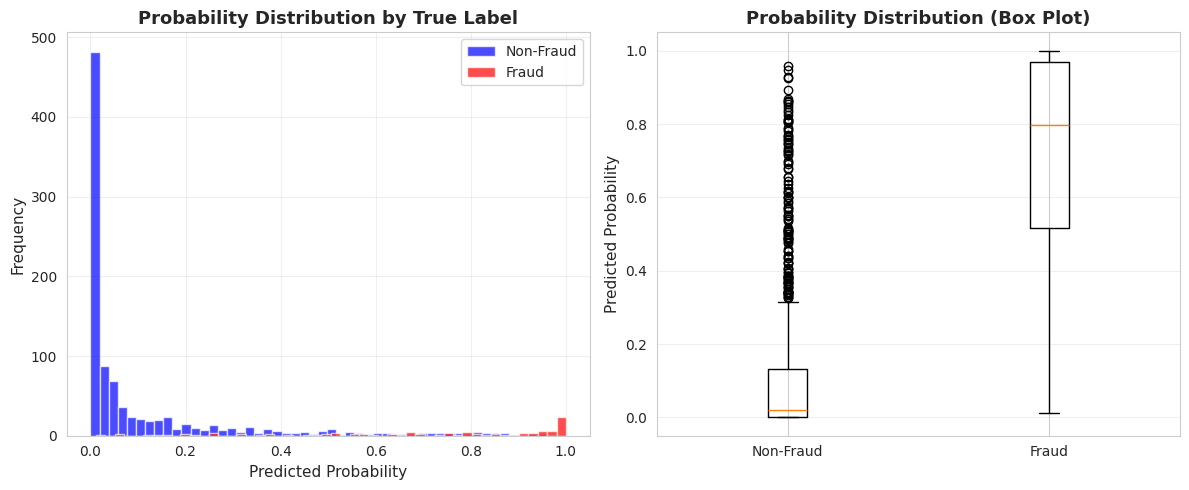

In [ ]:
# Plot probability distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(preds_df[preds_df['y_true'] == 0]['y_prob'], bins=50, alpha=0.7, label='Non-Fraud', color='blue')
plt.hist(preds_df[preds_df['y_true'] == 1]['y_prob'], bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Predicted Probability', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Probability Distribution by True Label', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([preds_df[preds_df['y_true'] == 0]['y_prob'],
             preds_df[preds_df['y_true'] == 1]['y_prob']],
            labels=['Non-Fraud', 'Fraud'])
plt.ylabel('Predicted Probability', fontsize=11)
plt.title('Probability Distribution (Box Plot)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 9. Summary Report

In [ ]:
print("\n" + "=" * 70)
print(" " * 15 + "HEALTHCARE FRAUD DETECTION - EVALUATION SUMMARY")
print("=" * 70)

print("\n📊 DATASET STATISTICS:")
print(f"  • Total test samples: {len(y_test):,}")
print(f"  • Fraud cases: {y_test.sum():,} ({y_test.sum()/len(y_test)*100:.2f}%)")
print(f"  • Non-fraud cases: {(y_test == 0).sum():,} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")

print("\n🎯 MODEL PERFORMANCE:")
print(f"  • Precision: {precision:.4f}")
print(f"  • Recall: {recall:.4f}")
print(f"  • F1 Score: {f1:.4f}")
print(f"  • ROC-AUC: {roc_auc:.4f}")
print(f"  • PR-AUC: {pr_auc:.4f}")

print("\n📈 CONFUSION MATRIX:")
print(f"  • True Negatives: {tn:,}")
print(f"  • False Positives: {fp:,}")
print(f"  • False Negatives: {fn:,}")
print(f"  • True Positives: {tp:,}")

print("\n💰 COST ANALYSIS:")
print(f"  • Cost from False Negatives: ${fn * cost_fn:,}")
print(f"  • Cost from False Positives: ${fp * cost_fp:,}")
print(f"  • Total Estimated Cost: ${total_cost:,}")

print("\n" + "=" * 70)
print("✅ Evaluation complete!")
print("=" * 70)


               HEALTHCARE FRAUD DETECTION - EVALUATION SUMMARY

📊 DATASET STATISTICS:
  • Total test samples: 1,082
  • Fraud cases: 101 (9.33%)
  • Non-fraud cases: 981 (90.67%)

🎯 MODEL PERFORMANCE:
  • Precision: 0.5200
  • Recall: 0.7723
  • F1 Score: 0.6215
  • ROC-AUC: 0.9464
  • PR-AUC: 0.7370

📈 CONFUSION MATRIX:
  • True Negatives: 909
  • False Positives: 72
  • False Negatives: 23
  • True Positives: 78

💰 COST ANALYSIS:
  • Cost from False Negatives: $230,000
  • Cost from False Positives: $72,000
  • Total Estimated Cost: $302,000

✅ Evaluation complete!
